In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
# Define column names
columns = [f'feature_{i+1}' for i in range(57)] + ['label']

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(url, header=None, names=columns)

# Display the first few rows
data.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


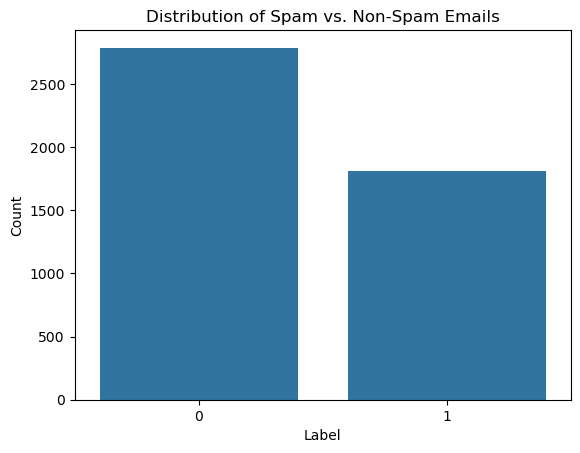

Total emails (N): 4601
Spam emails (N1): 1813
Non-spam emails (N0): 2788


In [68]:
# Plot the distribution of the target variable
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

N = len(data)                 # Total emails
N1 = data['label'].sum()      # Number of spam emails (label=1)
N0 = N - N1                   # Number of non-spam emails (label=0)

print(f"Total emails (N): {N}")
print(f"Spam emails (N1): {N1}")
print(f"Non-spam emails (N0): {N0}")


In [69]:
# Calculate prior probabilities
prior_probs = data['label'].value_counts(normalize=True)
print("Prior Probabilities:")
print(prior_probs)


Prior Probabilities:
label
0    0.605955
1    0.394045
Name: proportion, dtype: float64


In [70]:
# Calculate likelihood P(feature_1 | label)
likelihood = pd.crosstab(data['feature_1'], data['label'], normalize='columns')
print("Likelihood (P(feature_1 | label)):")
print(likelihood)


Likelihood (P(feature_1 | label)):
label             0         1
feature_1                    
0.00       0.852224  0.646442
0.01       0.001435  0.000000
0.02       0.001435  0.000000
0.03       0.001435  0.000000
0.04       0.002511  0.000000
...             ...       ...
3.84       0.000359  0.000000
3.94       0.000359  0.000000
4.00       0.000359  0.000000
4.34       0.000359  0.000000
4.54       0.000000  0.000552

[142 rows x 2 columns]


In [79]:
# Define the feature value
feature_value = 0.1

# Calculate the likelihood P(feature_1 = 0.1 | label)
likelihood_value = likelihood.loc[feature_value] if feature_value in likelihood.index else [0, 0]

# Calculate the prior probabilities
prior_spam = prior_probs[1]  # P(label = 1)
prior_ham = prior_probs[0]   # P(label = 0)

# Calculate the marginal likelihood P(feature_1 = 0.1)
marginal_likelihood = (likelihood_value[0] * prior_ham) + (likelihood_value[1] * prior_spam)

# Calculate the posterior probabilities
posterior_spam = (likelihood_value[1] * prior_spam) / marginal_likelihood
posterior_ham = (likelihood_value[0] * prior_ham) / marginal_likelihood

print(f"Posterior Probability (Spam | feature_1 = {feature_value}): {posterior_spam}")
print(f"Posterior Probability (Not Spam | feature_1 = {feature_value}): {posterior_ham}")


Posterior Probability (Spam | feature_1 = 0.1): 0.7647058823529411
Posterior Probability (Not Spam | feature_1 = 0.1): 0.23529411764705882


Confusion Matrix:
[[620 217]
 [ 26 518]]


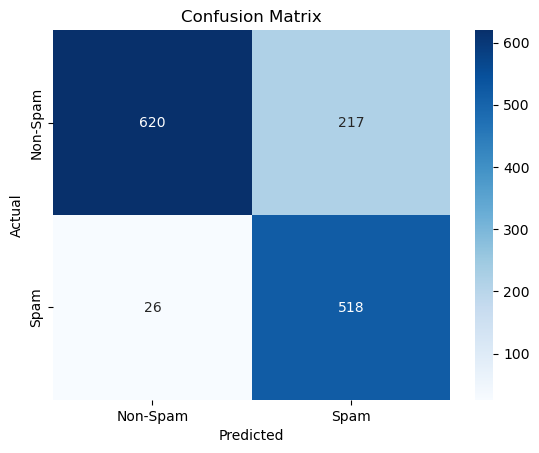

Accuracy: 0.8240
Precision (Spam): 0.7048
Recall (Spam): 0.9522
F1 Score (Spam): 0.8100

Classification Report:
              precision    recall  f1-score   support

    Non-Spam       0.96      0.74      0.84       837
        Spam       0.70      0.95      0.81       544

    accuracy                           0.82      1381
   macro avg       0.83      0.85      0.82      1381
weighted avg       0.86      0.82      0.83      1381



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
cols = [f'feature_{i+1}' for i in range(57)] + ['label']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(url, header=None, names=cols)

# Split features and target
X = data.drop('label', axis=1)
y = data['label']

# Split into train/test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test set
y_pred = gnb.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)   # For class 'spam' (label=1)
recall = recall_score(y_test, y_pred)         # For class 'spam'
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Spam): {precision:.4f}")
print(f"Recall (Spam): {recall:.4f}")
print(f"F1 Score (Spam): {f1:.4f}")

# Detailed classification report (for all classes)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Spam', 'Spam']))
